### Import and extract data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# read dataset
bos_10 = pd.read_csv("./age/ACSDT1Y2010.B07001_data_with_overlays_2021-11-16T201920.csv")
bos_11 = pd.read_csv("./age/ACSDT1Y2011.B07001_data_with_overlays_2021-11-16T201920.csv")
bos_12 = pd.read_csv("./age/ACSDT1Y2012.B07001_data_with_overlays_2021-11-16T201920.csv")
bos_13 = pd.read_csv("./age/ACSDT1Y2013.B07001_data_with_overlays_2021-11-16T201920.csv")
bos_14 = pd.read_csv("./age/ACSDT1Y2014.B07001_data_with_overlays_2021-11-16T201920.csv")
bos_15 = pd.read_csv("./age/ACSDT1Y2015.B07001_data_with_overlays_2021-11-16T201920.csv")
bos_16 = pd.read_csv("./age/ACSDT1Y2016.B07001_data_with_overlays_2021-11-16T201920.csv")
bos_17 = pd.read_csv("./age/ACSDT1Y2017.B07001_data_with_overlays_2021-11-16T201920.csv")
bos_18 = pd.read_csv("./age/ACSDT1Y2018.B07001_data_with_overlays_2021-11-16T201920.csv")
bos_19 = pd.read_csv("./age/ACSDT1Y2019.B07001_data_with_overlays_2021-11-16T201920.csv")

In [96]:
# bos contains all the datasets from 2010 to 2019
bos = [bos_10, bos_11, bos_12, bos_13, bos_14, bos_15, bos_16, bos_17, bos_18, bos_19]

# lst containsdata for geo mobility by states
lst = ['B07001_069E','B07001_070E','B07001_071E',
       'B07001_072E','B07001_073E','B07001_074E',
       'B07001_075E','B07001_076E','B07001_077E',
       'B07001_078E']

# lst2 contains data for geo mobility from abraod
lst2 = ['B07001_085E','B07001_086E','B07001_087E',
        'B07001_088E','B07001_089E','B07001_090E',
        'B07001_091E','B07001_092E','B07001_093E',
        'B07001_094E']

state = [] #MA: moving from other states
state_bos = [] #Boston: moving from other states
abroad = [] #MA: moving from abroad
abroad_bos = [] #Boston: moving from abroad

#Extract the geo mobility from other states for MA and Boston
for df in bos:
    temp = []
    temp_bos = []
    for l in lst:
        temp.append(float(df[l][1]))
        temp_bos.append(float(df[l][2]))

    state.append(temp)
    state_bos.append(temp_bos)

#Extract the geo mobility from abroad for MA and Boston
for df in bos:
    temp2 = []
    temp2_bos = []
    for l in lst2:
        temp2.append(float(df[l][1]))
        temp2_bos.append(float(df[l][2]))

    abroad.append(temp2)
    abroad_bos.append(temp2_bos)

    
#Population changes for MA and Boston
ma = []
bo = []
for df in bos:
    ma.append(int(df['B07001_001E'][1]))
    bo.append(int(df['B07001_001E'][2]))

In [92]:
#Population increase in 2019 as comapred to 2010
(bo[-1] - bo[0])/bo[0]

0.11599031234720912

### Population analysis

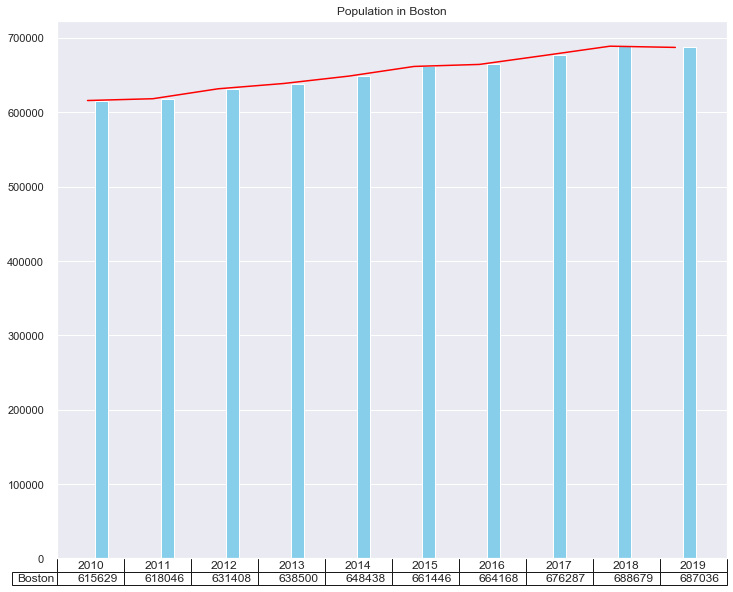

In [83]:
#Plot for Boston population over the years
plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
plt.style.use(['seaborn'])
sns.set(palette='colorblind')

labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

bar_width = 0.20
data = [bo]

colors = sns.color_palette(palette='colorblind')
columns = ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')

index = np.arange(len(labels))
fig = plt.figure(figsize=(12,9))
plt.bar(index+bar_width+.02, bo, bar_width, color = 'skyblue')
plt.plot(bo, color = 'red')
plt.table(cellText=data,
          rowLabels=['Boston'],
          colLabels=columns,
          loc='bottom')

fig.subplots_adjust(bottom=0.05)
plt.xticks([])
plt.title('Population in Boston')
#plt.show()
plt.savefig("population.png", dpi=200, bbox_inches = "tight")

### MA geo mobility analysis

Text(0.5, 1.0, 'Population in MA')

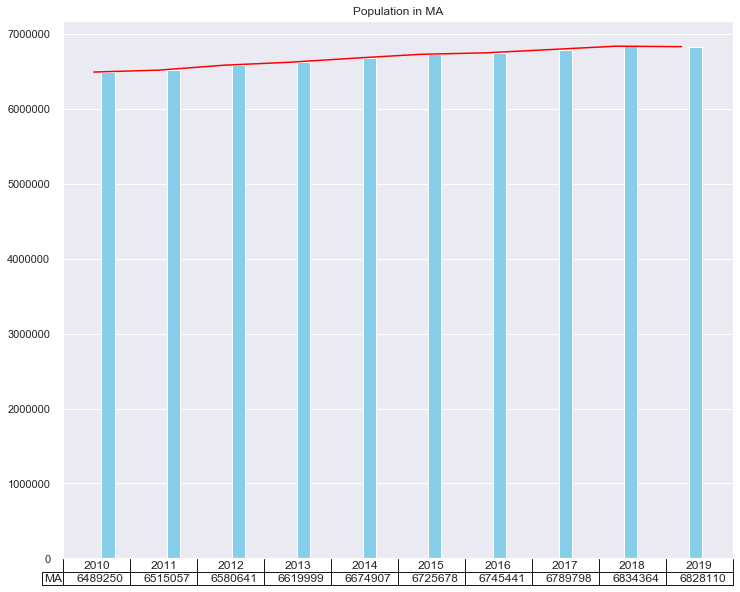

In [91]:
#Plot for MA population over the years
plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
plt.style.use(['seaborn'])
sns.set(palette='colorblind')

labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

bar_width = 0.20
data_MA = [ma]

colors = sns.color_palette(palette='colorblind')
columns = ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')

index = np.arange(len(labels))
fig = plt.figure(figsize=(12,9))
plt.bar(index+bar_width+.02, ma, bar_width, color = 'skyblue')
plt.plot(ma, color = 'red')
plt.table(cellText=data_MA,
          rowLabels=['MA'],
          colLabels=columns,
          loc='bottom')


fig.subplots_adjust(bottom=0.05)
plt.xticks([])
plt.title('Population in MA')
#plt.show()
#plt.savefig("population_ma.png", dpi=200, bbox_inches = "tight")

In [31]:
#Rearrange the data in age groups of ['20-29','30-39','40-49','50-59','60-69'] for MA
n = len(state[0])
state_n = []
for x in state:
    i = 0
    gp = []
    while i < n:
        new = x[i] + x[i+1]
        gp.append(new)
        i += 2
    state_n.append(gp)

abroad_n = []
for x in abroad:
    i = 0
    gp = []
    while i < n:
        new = x[i] + x[i+1]
        gp.append(new)
        i += 2
    abroad_n.append(gp)

In [41]:
#Store in a dataframe in new age groups
state_df = pd.DataFrame(state_n, columns = ['20-29','30-39','40-49','50-59','60-69'])
state_df['year'] = labels
abroad_df = pd.DataFrame(abroad_n, columns = ['20-29','30-39','40-49','50-59','60-69'])
abroad_df['year'] = labels

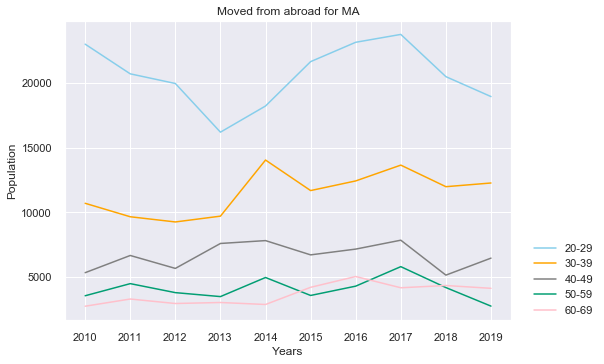

In [102]:
#Plot for geo mobility from abroad over the years by age groups
labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

plt.plot(labels, abroad_df['20-29'], label = "20-29", c='skyblue')
plt.plot(labels, abroad_df['30-39'], label = "30-39", c='orange')
plt.plot(labels, abroad_df['40-49'], label = "40-49", c='grey')
plt.plot(labels, abroad_df['50-59'], label = "50-59", c='g')
plt.plot(labels, abroad_df['60-69'], label = "60-69", c='pink')


plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Moved from abroad for MA')
plt.legend(loc=(1.04,0))
plt.savefig("abroad.png", dpi=200, bbox_inches = "tight")
#plt.show()

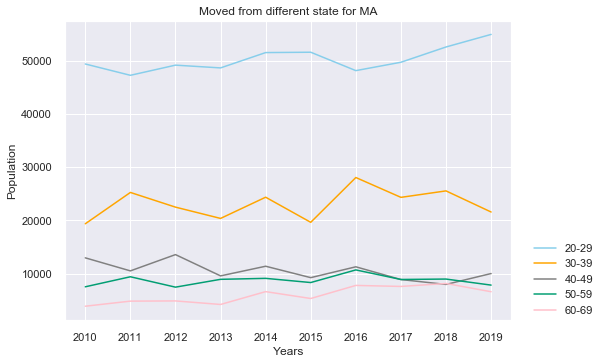

In [101]:
#Plot for geo mobility from other states over the years by age groups
labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

plt.plot(labels, state_df['20-29'], label = "20-29", c='skyblue')
plt.plot(labels, state_df['30-39'], label = "30-39", c='orange')
plt.plot(labels, state_df['40-49'], label = "40-49", c='grey')
plt.plot(labels, state_df['50-59'], label = "50-59", c='g')
plt.plot(labels, state_df['60-69'], label = "60-69", c='pink')

plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Moved from different state for MA')
plt.legend(loc=(1.04,0))
plt.savefig("state.png", dpi=200, bbox_inches = "tight")
#plt.show()

### Boston geo mobility analysis

In [97]:
#Rearrange the data in age groups of ['20-29','30-39','40-49','50-59','60-69'] for Boston
state_n_bos = []
for x in state_bos:
    i = 0
    gp = []
    while i < n:
        new = x[i] + x[i+1]
        gp.append(new)
        i += 2
    state_n_bos.append(gp)

abroad_n_bos = []
for x in abroad_bos:
    i = 0
    gp = []
    while i < n:
        new = x[i] + x[i+1]
        gp.append(new)
        i += 2
    abroad_n_bos.append(gp)


In [98]:
#Store in dataframe
state_df_bos = pd.DataFrame(state_n_bos, columns = ['20-29','30-39','40-49','50-59','60-69'])
state_df_bos['year'] = labels
abroad_df_bos = pd.DataFrame(abroad_n_bos, columns = ['20-29','30-39','40-49','50-59','60-69'])
abroad_df_bos['year'] = labels

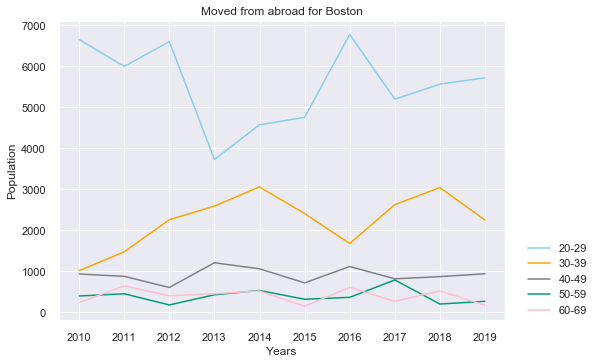

In [103]:
#Plot for geo mobility from abroad over the years by age groups
labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

plt.plot(labels, abroad_df_bos['20-29'], label = "20-29", c='skyblue')
plt.plot(labels, abroad_df_bos['30-39'], label = "30-39", c='orange')
plt.plot(labels, abroad_df_bos['40-49'], label = "40-49", c='grey')
plt.plot(labels, abroad_df_bos['50-59'], label = "50-59", c='g')
plt.plot(labels, abroad_df_bos['60-69'], label = "60-69", c='pink')


plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Moved from abroad for Boston')
plt.legend(loc=(1.04,0))
plt.savefig("abroad_bos.png", dpi=200, bbox_inches = "tight")
#plt.show()

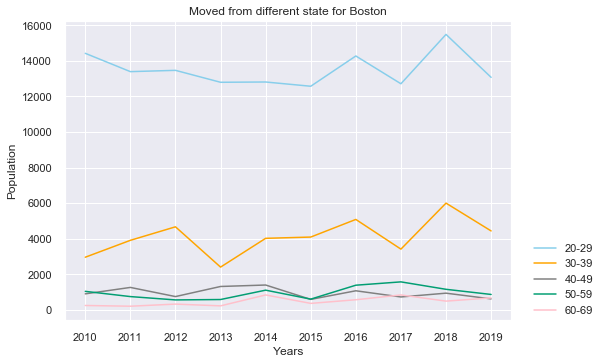

In [104]:
#Plot for geo mobility from different states over the years by age groups
labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

plt.plot(labels, state_df_bos['20-29'], label = "20-29", c='skyblue')
plt.plot(labels, state_df_bos['30-39'], label = "30-39", c='orange')
plt.plot(labels, state_df_bos['40-49'], label = "40-49", c='grey')
plt.plot(labels, state_df_bos['50-59'], label = "50-59", c='g')
plt.plot(labels, state_df_bos['60-69'], label = "60-69", c='pink')


plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Moved from different state for Boston')
plt.legend(loc=(1.04,0))
plt.savefig("state_bos.png", dpi=200, bbox_inches = "tight")
#plt.show()